<a href="https://colab.research.google.com/github/Thilan67/Mall_Customer_Clustering/blob/main/MallCustomer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans

In [2]:
import pandas as pd
MallC_data = pd.read_csv('/content/Mall_Customers.csv')
MallC_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
MallC_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [18]:
# Drop CustomerID
MallC_data = MallC_data.drop("CustomerID", axis=1)

In [27]:
MallC_data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [9]:
MallC_data.shape

(200, 5)

In [10]:
MallC_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [26]:
# Separate feature types
numeric_cols = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
categorical_cols = ["Gender"]

# Preprocessing pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop="first")  # Male/Female → Female=0, Male=1

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

# Create pipeline with preprocessing + clustering
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("cluster", KMeans(n_clusters=5, random_state=42))
])

In [29]:
pipeline.fit(MallC_data)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Annual Income (k$)',
                                                   'Spending Score (1-100)']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender'])])),
                ('cluster', KMeans(n_clusters=5, random_state=42))])

In [30]:
# Get cluster labels
MallC_data["Cluster"] = pipeline.named_steps["cluster"].labels_

print(MallC_data.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0    Male   19                  15                      39        2
1    Male   21                  15                      81        4
2  Female   20                  16                       6        2
3  Female   23                  16                      77        4
4  Female   31                  17                      40        2


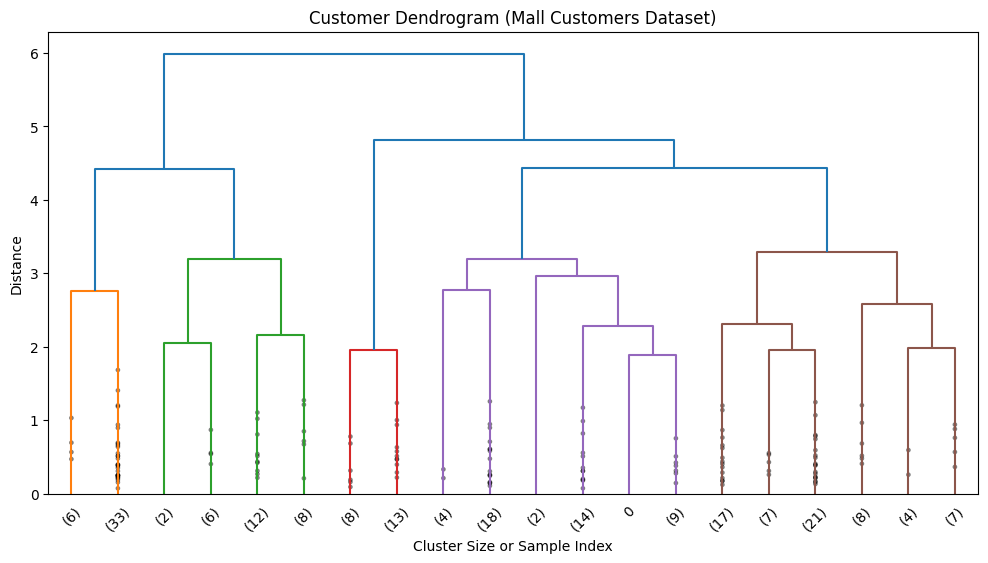

In [32]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram

# Apply preprocessing
MallC_data_prepared = preprocessor.fit_transform(MallC_data)

# Hierarchical clustering (linkage matrix)
Z = linkage(MallC_data_prepared, method="complete")

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode="lastp", p=20, leaf_rotation=45., leaf_font_size=10., show_contracted=True)
plt.title("Customer Dendrogram (Mall Customers Dataset)")
plt.xlabel("Cluster Size or Sample Index")
plt.ylabel("Distance")
plt.show()
